In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [2]:
# Read the data
df = pd.read_csv('datasets/Spotify_YoutubeClean.csv')
df = df.set_index('id')

In [3]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(20177, 29)
(19170, 29)


In [4]:
df.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream',
       'Popularity Score', 'Popularity'],
      dtype='object')

In [5]:
# Drop columns that are not needed
df = df.drop(['Artist', 'Url_spotify', 'Track', 'Album', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Stream', 'Popularity Score'], axis=1)

In [6]:
# Separate features X and target y
X = df.drop('Popularity', axis=1)

y = df['Popularity']

In [7]:
# Perform label encoding for categorical features
label_encoder = LabelEncoder()
X['Album_type'] = label_encoder.fit_transform(X['Album_type'])
X['Licensed'] = label_encoder.fit_transform(X['Licensed'])
X['official_video'] = label_encoder.fit_transform(X['official_video'])

X.head()

,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Licensed,official_video
id,,,,,,,,,,,,,,
0,0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,1,1
1,0,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,1,1
2,2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,1,1
3,0,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,1,1
4,0,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,1,1


In [8]:
# Feature scaling on numerical features by hand
# numerical_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
#                       'Liveness', 'Valence', 'Tempo', 'Duration_ms']
# X_train[numerical_features] = (X_train[numerical_features] - X_train[numerical_features].mean()) / X_train[numerical_features].std()
# X_test[numerical_features] = (X_test[numerical_features] - X_train[numerical_features].mean()) / X_train[numerical_features].std()

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # Adjust the test_size as desired

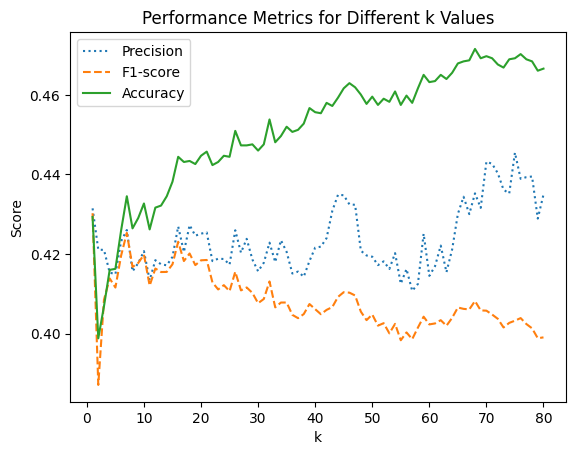

In [12]:
# Try with different values of k

k_values = range(1, 81) 
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over the range of k values
for k in k_values:
    # Instantiate KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = knn.predict(X_test)
    
    # Calculate and store the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    f1_scores.append(f1)
    
# Plot the performance metrics against the range of k values with different types of lines
plt.plot(k_values, precision_scores, label='Precision', linestyle='dotted')
plt.plot(k_values, f1_scores, label='F1-score', linestyle='dashed')
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Performance Metrics for Different k Values')
plt.legend()
plt.show()

In [10]:
# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=64)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

     High Popularity       0.35      0.08      0.13       796
      Low Popularity       0.57      0.51      0.53      1086
 Moderate Popularity       0.44      0.75      0.56      1551
Very High Popularity       0.09      0.00      0.01       401

            accuracy                           0.47      3834
           macro avg       0.36      0.34      0.31      3834
        weighted avg       0.42      0.47      0.40      3834



In [11]:
# Perform cross-validation
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)

# Print average accuracy across folds
print("CV Accuracy Scores: {}".format(cv_scores))
print("CV Accuracy: {}".format(cv_scores.mean()))

CV Accuracy Scores: [0.48643714 0.47157016 0.47835159 0.4600939  0.43348983]
CV Accuracy: 0.4659885237350026
